#HEART HEALTH


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

: 

In [20]:
df= pd.read_csv(r'C:\Users\Charitasri\Untitled Folder 1\heart_disease_health_indicators_BRFSS2015.csv')

In [21]:
df.sample(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
230665,0.0,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,1.0,0.0,0.0,9.0,5.0,8.0
40924,0.0,0.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,2.0,0.0,0.0,13.0,4.0,6.0
18264,0.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
114315,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,10.0,5.0,6.0
40526,0.0,1.0,1.0,1.0,22.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,3.0,0.0,0.0,0.0,10.0,4.0,6.0


In [ ]:
import dataclasses


missing_labels = ['Education', 'Income', 'NoDocbcCost']

if dataclasses.columns.isin(missing_labels).all():
    data = dataclasses.dataclass.drop(missing_labels, axis=1)
else:
    print("One or more labels are not in the dataframe")

: 

In [30]:
print(df.columns)

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age'],
      dtype='object')


In [31]:
df = df.drop('NoDocbcCost', axis=1)

In [32]:
df.sample(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
209855,0.0,0.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,11.0
11809,0.0,1.0,1.0,1.0,31.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.0,5.0,3.0,1.0,0.0,11.0
30154,0.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,4.0,0.0,30.0,1.0,1.0,13.0
80140,1.0,1.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,6.0,0.0,0.0,11.0
226008,0.0,0.0,1.0,1.0,21.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,0.0,5.0,0.0,0.0,8.0


In [33]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64

In [34]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age'],
      dtype='object')

In [36]:
variable_names = ['Age', 'MentHlth', 'PhysHlth', 'BMI']

In [55]:
catcol = ['HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare','GenHlth',
       'DiffWalk', 'Sex']

C:\Users\Charitasri\AppData\Local\Temp\ipykernel_1832\1400882413.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Charitasri\AppData\Local\Temp\ipykernel_1832\1400882413.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Charitasri\AppData\Local\Temp\ipykernel_1832\1400882413.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Charitasri\AppData\Local\Temp\ipykernel_1832\1400882413.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Charitasri\AppData\Local\Temp\ipykernel_1832\1400882413.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Charitasri\AppData\Local\Temp\ipykernel_1832\1400882413.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Charitasri\AppData\Local\Temp\ipykernel_1832\1400882413.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_l

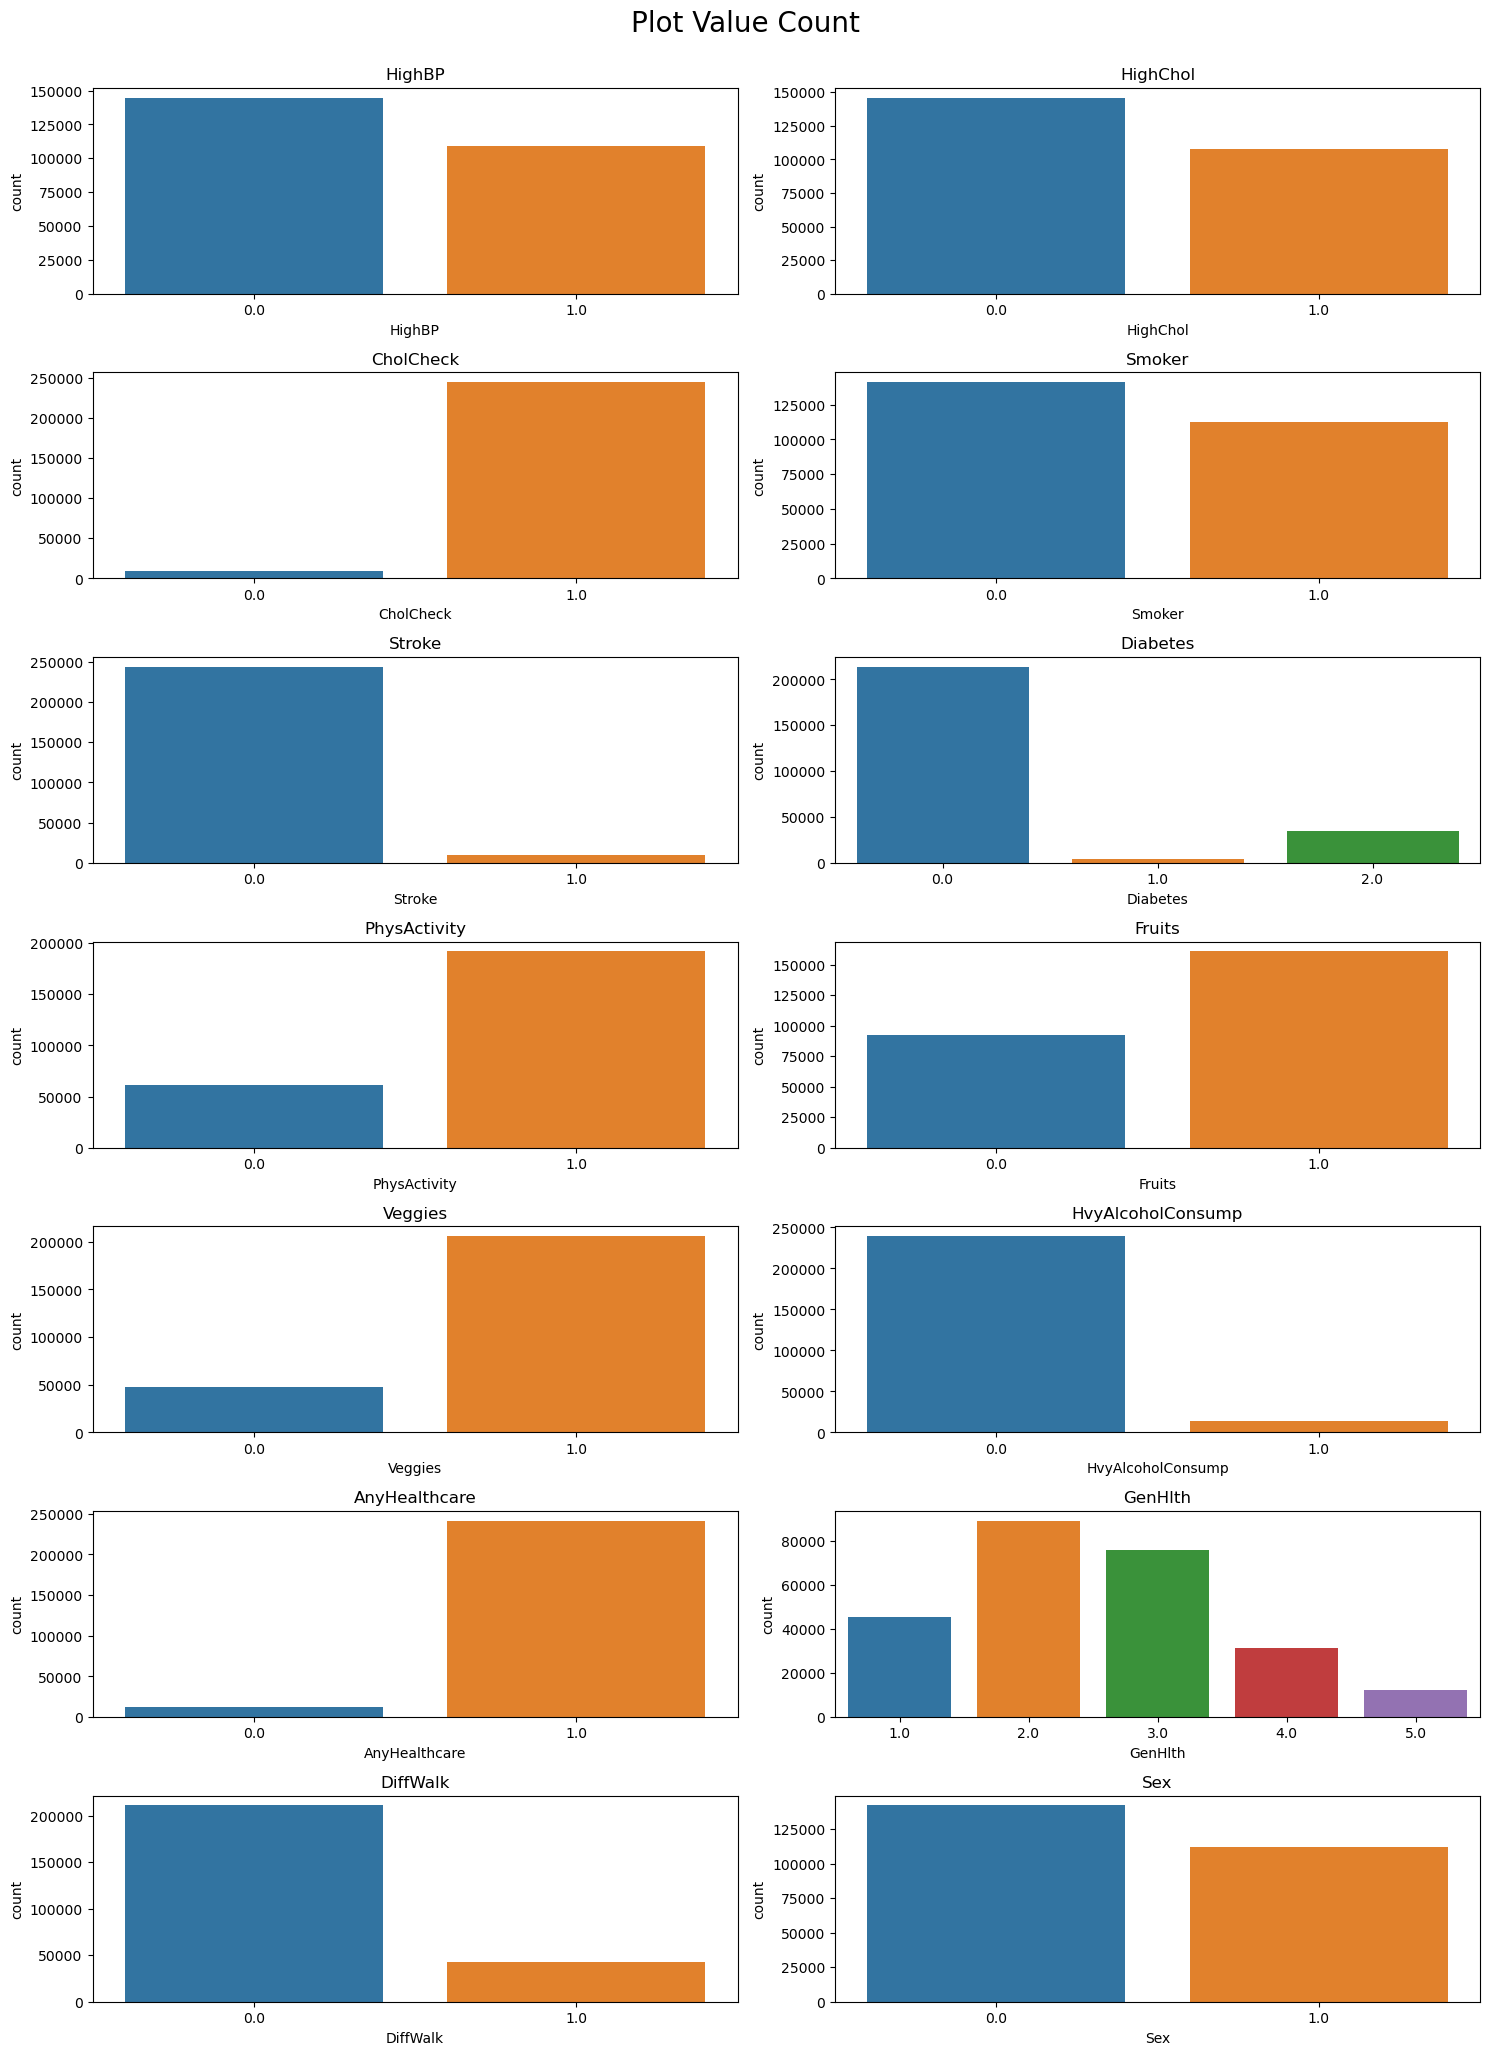

In [56]:
plt.figure(figsize=(15,40))
for i,column in enumerate(catcol):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

In [41]:
print("List of columns:", catcol)
print("Dataframe columns:", df.columns)

List of columns: ['', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'GenHlth', 'DiffWalk', 'Sex']
Dataframe columns: Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age'],
      dtype='object')


In [42]:
catcol = [column for column in catcol if column]

C:\Users\Charitasri\AppData\Local\Temp\ipykernel_1832\2586521992.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


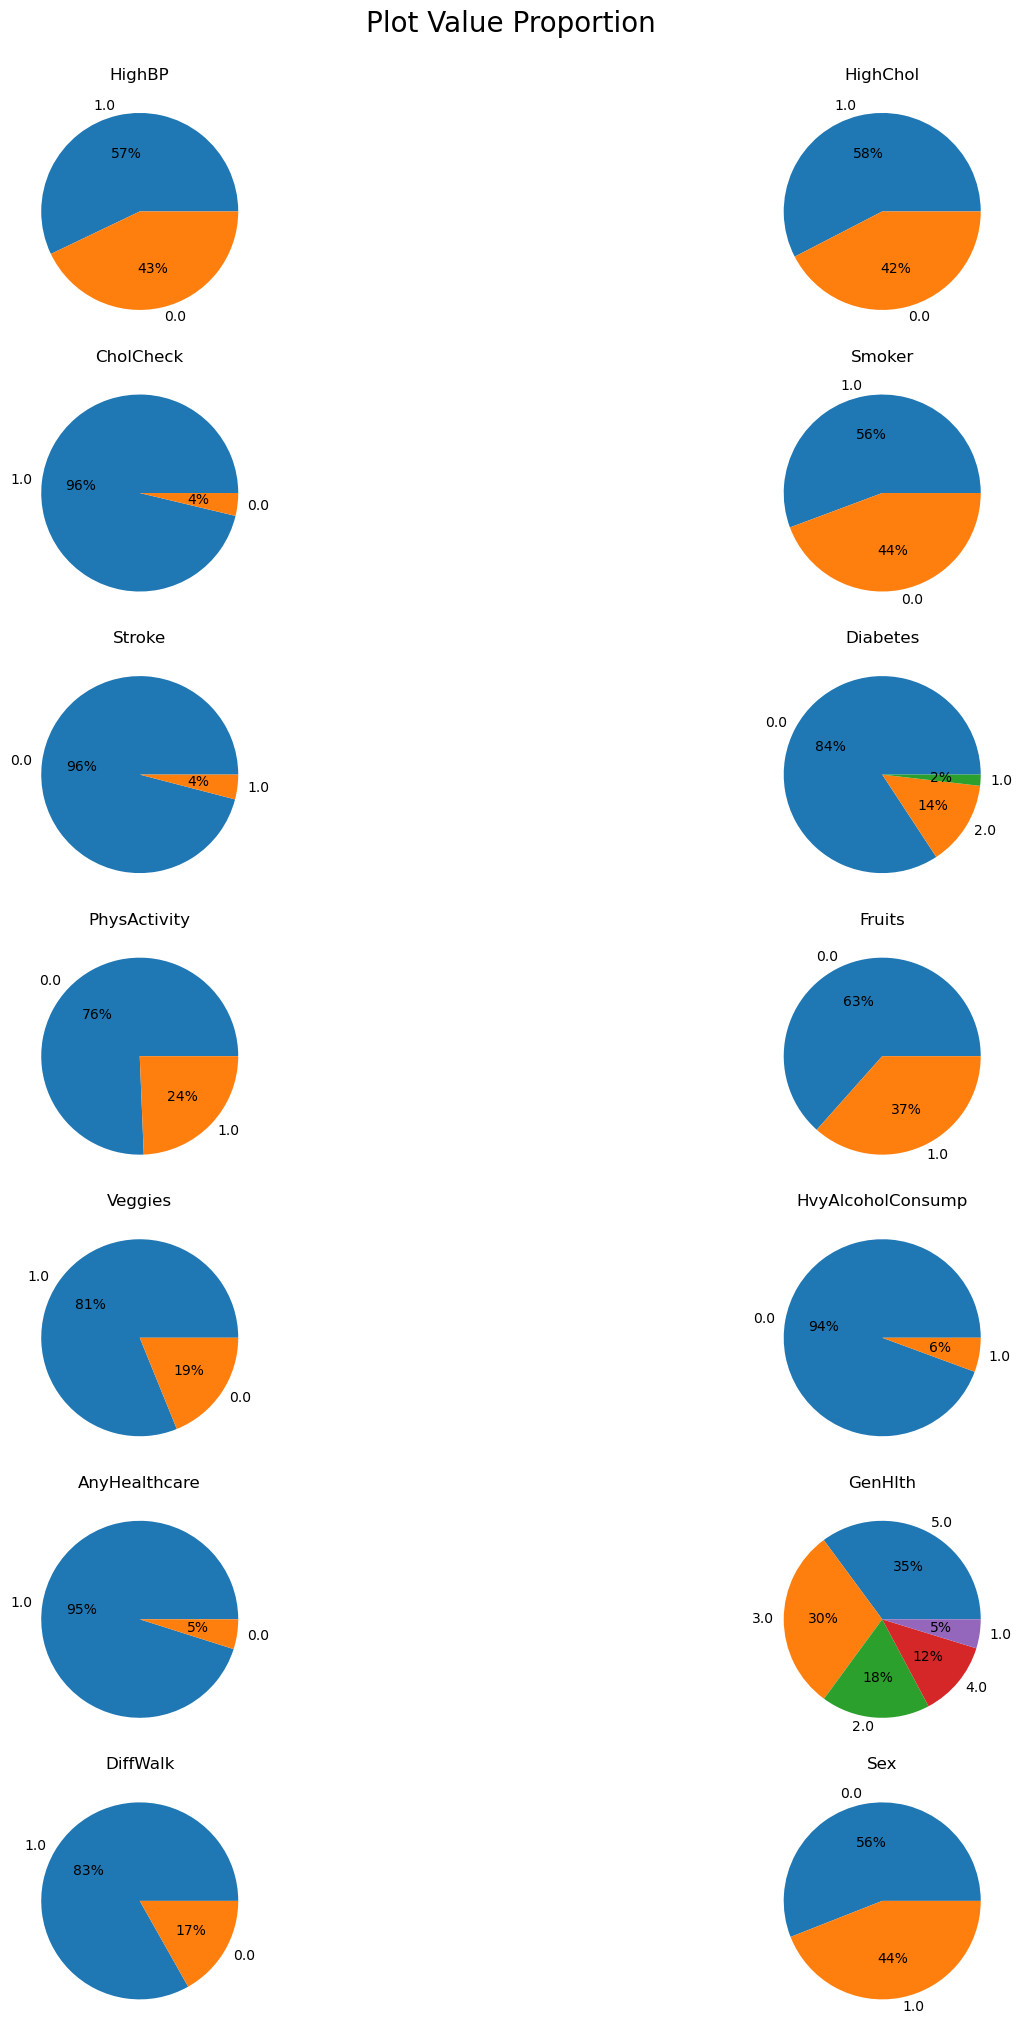

In [57]:
plt.figure(figsize=(15,40))
for i,column in enumerate(catcol):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Proportion", fontsize=20, x=0.5, y=1)
    plt.pie(x=df[column].value_counts(), labels=df[column].unique(), autopct='%.0f%%')
    plt.title(f"{column}")
    plt.tight_layout()

<Axes: xlabel='BMI', ylabel='Count'>

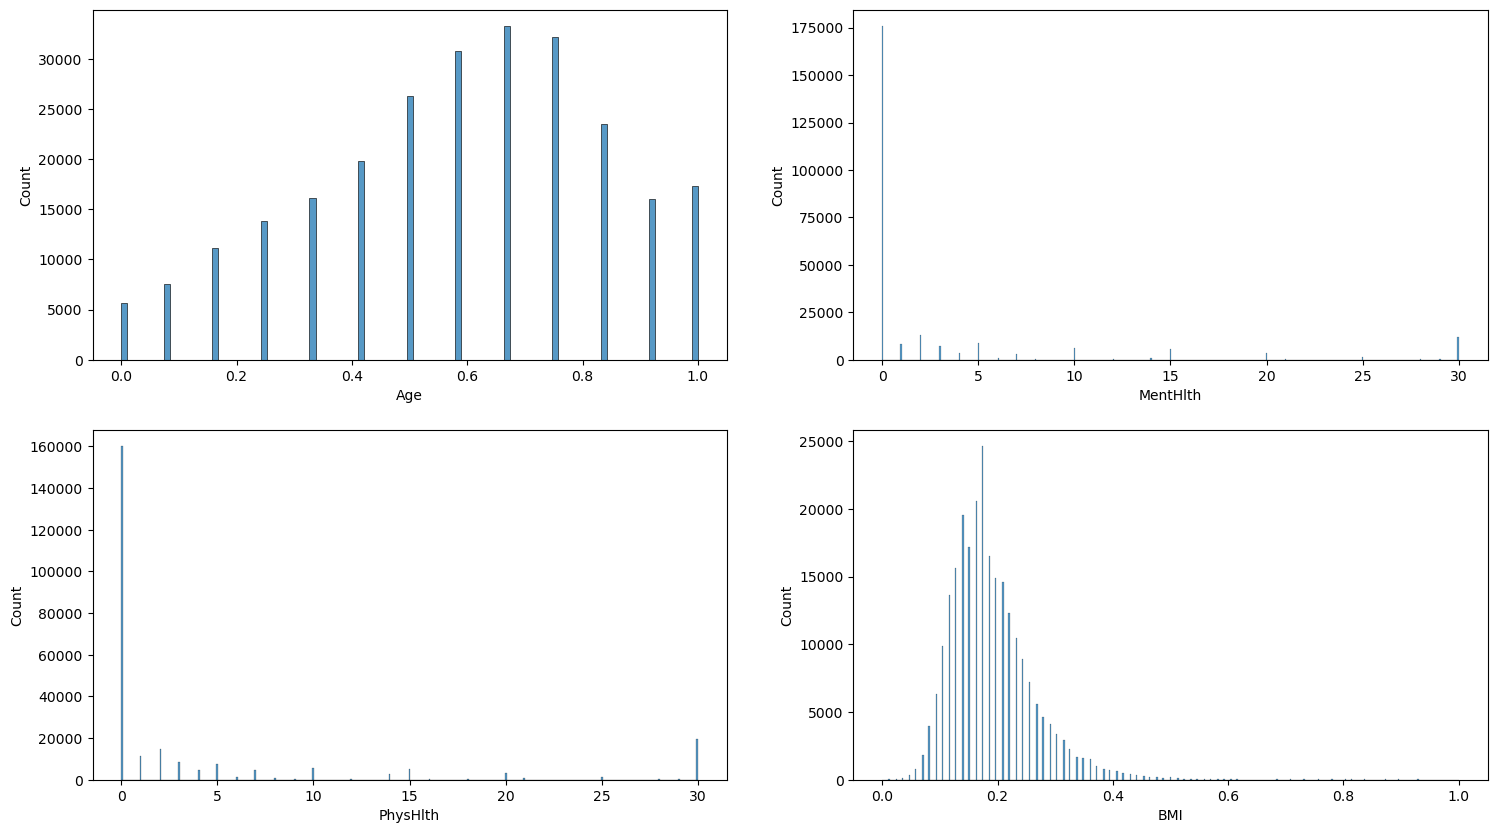

In [58]:
distcol = ['Age', 'MentHlth', 'PhysHlth', 'BMI']
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0,0], data=df, x=distcol[0])
sns.histplot(ax=axes[0,1], data=df, x=distcol[1])
sns.histplot(ax=axes[1,0], data=df, x=distcol[2])
sns.histplot(ax=axes[1,1], data=df, x=distcol[3])

<Axes: xlabel='BMI', ylabel='Count'>

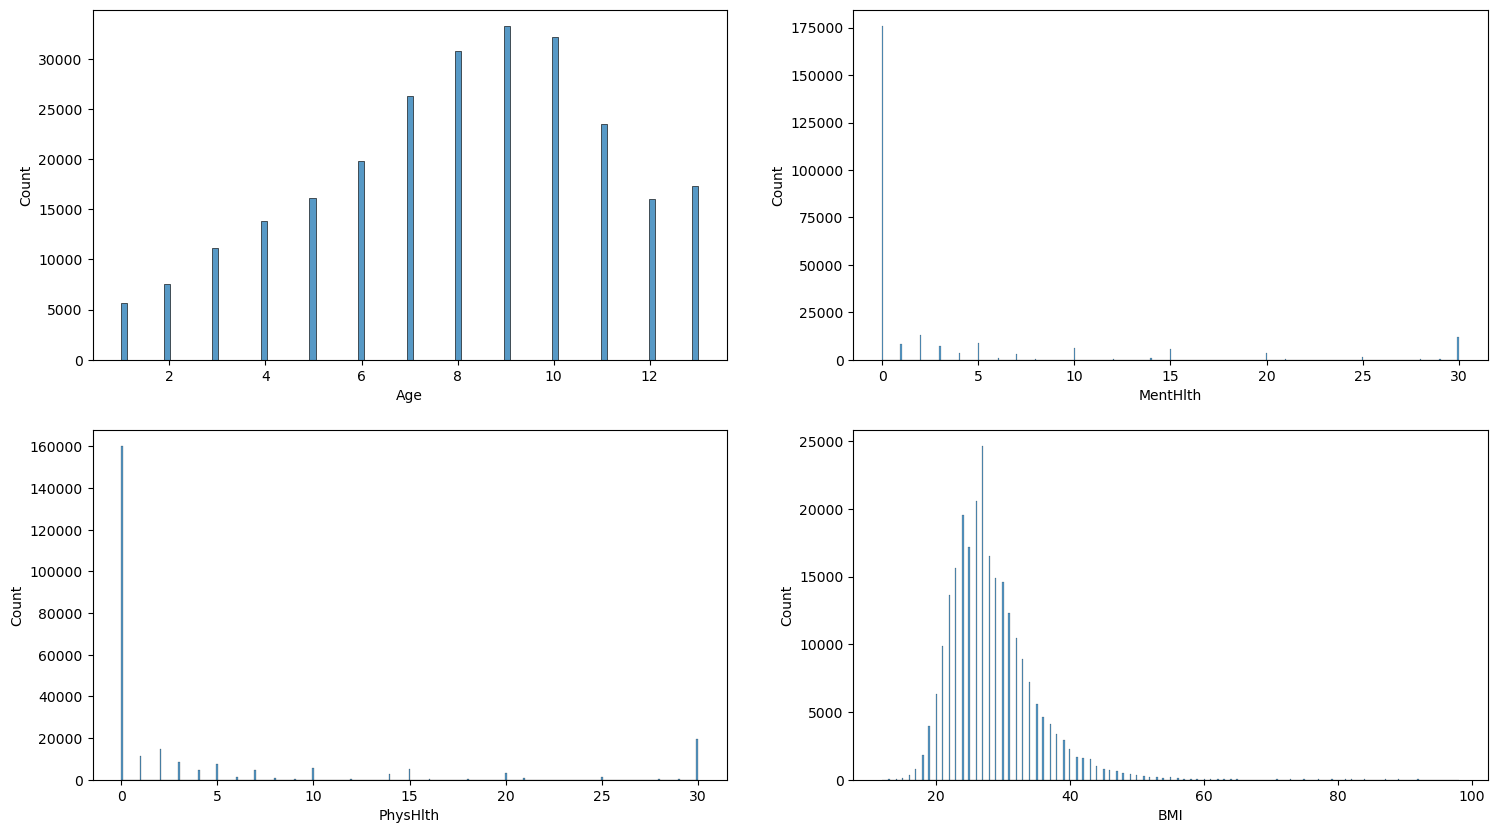

In [45]:
distcol = ['Age', 'MentHlth', 'PhysHlth', 'BMI']
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0,0], data=df, x=distcol[0])
sns.histplot(ax=axes[0,1], data=df, x=distcol[1])
sns.histplot(ax=axes[1,0], data=df, x=distcol[2])
sns.histplot(ax=axes[1,1], data=df, x=distcol[3])

C:\Users\Charitasri\AppData\Local\Temp\ipykernel_1832\2221031745.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Charitasri\AppData\Local\Temp\ipykernel_1832\2221031745.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Charitasri\AppData\Local\Temp\ipykernel_1832\2221031745.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Charitasri\AppData\Local\Temp\ipykernel_1832\2221031745.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Charitasri\AppData\Local\Temp\ipykernel_1832\2221031745.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Charitasri\AppData\Local\Temp\ipykernel_1832\2221031745.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Charitasri\AppData\Local\Temp\ipykernel_1832\2221031745.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_l

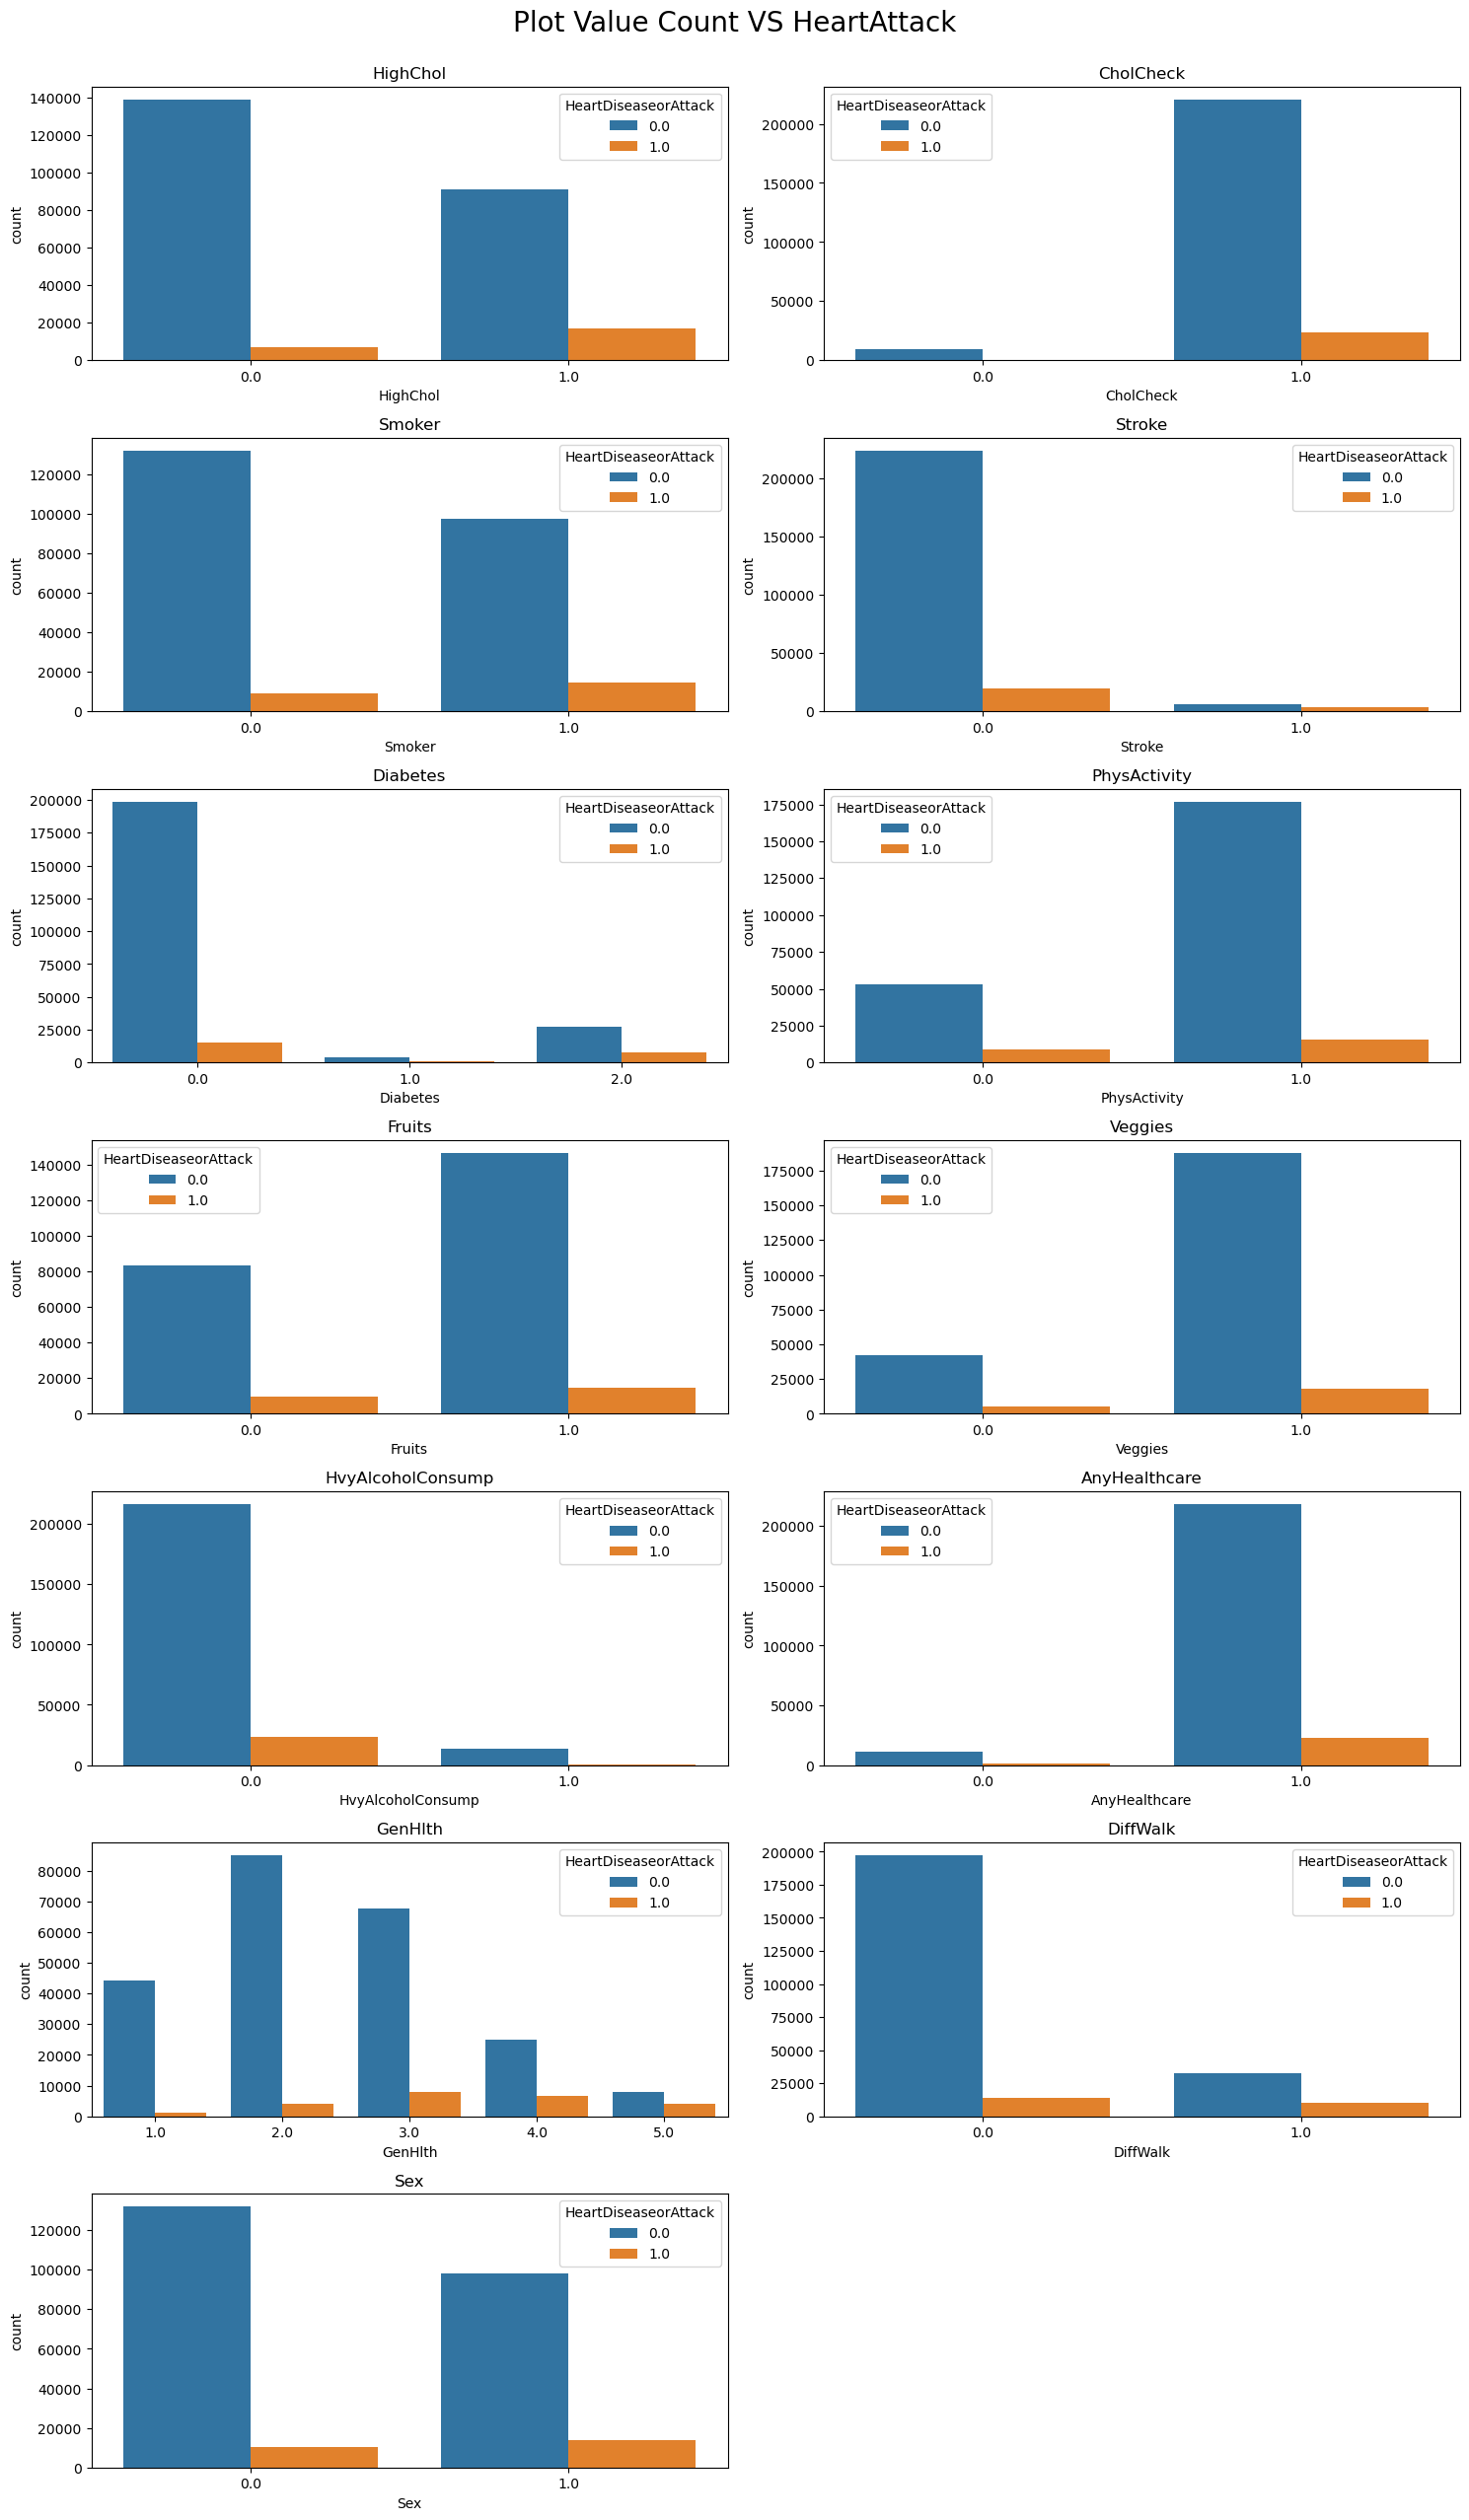

In [59]:
plt.figure(figsize=(15,50))
for i,column in enumerate(catcol[1:]):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='HeartDiseaseorAttack')
    plt.title(f"{column}")
    plt.tight_layout()

In [60]:
bincol = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
         'HvyAlcoholConsump', 'AnyHealthcare','DiffWalk', 'Sex']

In [61]:
# MinMaxScaler
for feature in ['BMI', 'MentHlth', 'PhysHlth']: 
    df[feature] = df[feature].astype('int64')
    df[feature] = MinMaxScaler(feature_range=(0, 1)).fit_transform(df[[feature]])

In [62]:
# Split column to Feature(X) and Target(Y)
X = df.drop(columns='HeartDiseaseorAttack')
Y = df['HeartDiseaseorAttack']

In [63]:
# Split data to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=48)

In [64]:
# I will try some classifier algorithm and not tune the parameter, let it default
algorithm = [
    RandomForestClassifier(),
]

In [69]:
log_cols = ["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [71]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

# Define the column names
log_cols = ["Classifier", "Accuracy", "Log Loss"]

# Initialize an empty DataFrame 'log'
log = pd.DataFrame(columns=log_cols)

# Define your algorithm(s)
algorithm = [RandomForestClassifier()]

# Your other code here...

for cla in algorithm:
    cla.fit(X_train, Y_train)
    name = cla.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')
    
    train_predictions = cla.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = cla.predict(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")
    
    # Create a dictionary to hold the values
    log_dict = {'Classifier': name, 'Accuracy': acc * 100, 'Log Loss': ll}
    
    # Convert the dictionary to a DataFrame and append it to 'log'
    log_entry = pd.DataFrame([log_dict])
    log = pd.concat([log, log_entry], ignore_index=True)
    
print("=" * 30)


RandomForestClassifier
****Results****
Accuracy: 89.6287%
Log Loss: 3.738207665829676


